### - Binome
+ Danoun Hayet
+ Issaad Serine

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer as Imputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA


# I. Apprentissage supervisé : Feature engineering et Classification

## 1. Data Preparation

In [25]:
#Importer ce jeu de données avec la librairie pandas
csv = pd.read_csv('credit_scoring.csv', sep=';')

#Transformer votre jeu de données de pandas Data Frame en numpy Array et separation des données a predire
data = csv.iloc[:, 0:13].values
data_vars=[]
status = csv.iloc[:, 13].values

#analyse des propriete des données
data.shape
nb0 = (status == 0).sum()
nb1 = (status == 1).sum()
print("Pourcentage d’exemples positifs (status=1) :  {:.2f}%".format((nb0/status.shape[0])*100))
print("Pourcentage d’exemples négatifs (status=0) :  {:.2f}%".format((nb1/status.shape[0])*100))

#séparation de données
X_train, X_test, y_train, y_test = train_test_split(data,status,test_size=0.5,random_state=1)

Pourcentage d’exemples positifs (status=1) :  27.79%
Pourcentage d’exemples négatifs (status=0) :  72.21%


array([1, 1, 0, 1, 1], dtype=int64)

## 2. Training and Testing

In [3]:
#defining a function returning the average of the precision and the accuracy for each of the 3 algorithms
def analyse(y_test,resultsDT, resultsKNN, resultsMLP):
    # Calculate precision and accuracy for each model
    precision_DT = precision_score(y_test, resultsDT)
    accuracy_DT = accuracy_score(y_test, resultsDT)

    precision_KNN = precision_score(y_test, resultsKNN)
    accuracy_KNN = accuracy_score(y_test, resultsKNN)

    precision_MLP = precision_score(y_test, resultsMLP)
    accuracy_MLP = accuracy_score(y_test, resultsMLP)

    # Calculate average precision and accuracy for each model
    avg_DT = (precision_DT + accuracy_DT) / 2
    avg_KNN = (precision_KNN + accuracy_KNN) / 2
    avg_MLP = (precision_MLP + accuracy_MLP) / 2

    # Create a DataFrame
    df = pd.DataFrame({
        'Model': ['DecisionTree', 'KNN', 'MLP'],
        'Average': [avg_DT, avg_KNN, avg_MLP]
    })

    return df

### Desion Tree Model

In [4]:
classifierDT = DecisionTreeClassifier(random_state=1)
classifierDT.fit(X_train,y_train)
resultDT = classifierDT.predict(X_test)

### K Nearest Neighbors

In [5]:
classifierKNN = KNeighborsClassifier(n_neighbors=5)
classifierKNN.fit(X_train,y_train)
resultKNN = classifierKNN.predict(X_test)

### Multilayer Perceptron

In [6]:
classifierMLP = MLPClassifier(hidden_layer_sizes=[40,20],random_state=1)
classifierMLP.fit(X_train,y_train)
resultMLP = classifierMLP.predict(X_test)

Voici un exemple d'une **matrice de confusion** en utilisant les valeurs prédites par le MLP. Savoir lire la matrice est la clé pour la bonne sélection des critères.

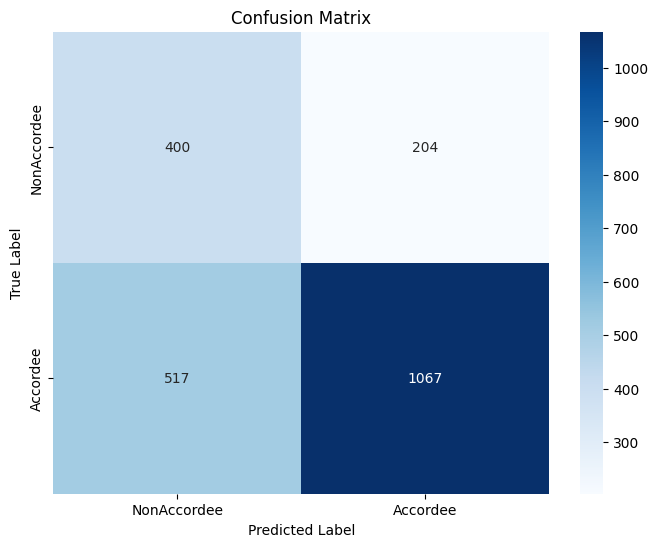

In [7]:
cm = confusion_matrix(y_test,resultMLP)

class_names = ['NonAccordee', 'Accordee']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Analyse: Choix du Meilleur Critere entre le rappel et la precision
Nous rappelons les formules:
+ Précision=TP/(TP+FP)
+ Rappel   =TP/(TP+FN)

Dans notre cas:
+ Les **FP** représentent les personnes auxquelles **on ne devrait pas accorder, mais on a quand même accordé**(des personnes qui nous causent une perte d'argent).
+ Les **FN** représentent les personnes auxquelles **on devrait accorder, mais on ne l'a pas fait**(des personnes mécontentes qui pourraient augmenter notre gain).

Ceci dit, on veut éviter la perte plus qu'autre chose. En utilisant des termes de la Data Science, notre priorité est de **minimiser les FPs**. D'où, la précision est le bon choix vu le but qu'on veut atteindre (précision élevée ==> FP bas, selon la formule mathématique de la Précision = TP / (TP + FP)).

On a donc pris la moyenne entre la précision et l'accuracy, étant les deux critères les plus importants.

In [8]:
#passing the results Y_test(the results) as parameters to the analyse function to get the average between precision and accuracy
df=analyse(y_test,resultDT,resultKNN,resultMLP)
print(df.to_string(index=False))

       Model  Average
DecisionTree 0.773283
         KNN 0.747917
         MLP 0.754986


#### Analyse des resultats
Nous pouvons remarquer une difference legere entre la moyenne des criteres, avec Decision Tree dans le top des models. Mais en changeant quelques facteurs/parameteres dans ce qui suit, nous pourrons probablement voir un changement des resultats.

### Data Normalization

In [9]:
scaler = StandardScaler()
scaler.fit(X_train) #data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

### Decsion Tree Model after Normalization

In [10]:
classifierDTN = DecisionTreeClassifier(random_state=1)
classifierDTN.fit(X_train_scaled,y_train)
resultDTN = classifierDTN.predict(X_test_scaled)

### K Nearest Neighbors after Normalization

In [11]:
classifierKNNN = KNeighborsClassifier(n_neighbors=5)
classifierKNNN.fit(X_train_scaled,y_train)
resultKNNN = classifierKNNN.predict(X_test_scaled)

### Multilayer Perceptron after Normalization

In [12]:
classifierMLPN = MLPClassifier(hidden_layer_sizes=[40,20],random_state=1,activation='logistic')
classifierMLPN.fit(X_train_scaled,y_train)
resultMLPN = classifierMLPN.predict(X_test_scaled)

In [13]:
dfn=analyse(y_test,resultDTN,resultKNNN,resultMLPN)
print(dfn.to_string(index=False))

       Model  Average
DecisionTree 0.772665
         KNN 0.781672
         MLP 0.812400


#### Analyse 
compares aux valeurs precedentes, les KNN et MLP ont donne de meuilleures resultats apres la normalisation avec une precision et une accuracy plus augmentees, contrairement a Decision Tree qui est reste presque stable. Le fonctionnement a change et il s'avere que le MLP pourrait etre le bon algorithme a choisir.

### PCA Components and consatenation with normalizaed data

In [14]:
pca = PCA(n_components=4)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

X_train_merged = np.concatenate((X_train_scaled,X_train_scaled_pca), axis = 1) 
X_test_merged = np.concatenate((X_test_scaled,X_test_scaled_pca), axis = 1)

In [27]:
# print(X_train_scaled_pca[:3,0:4])
# print(X_train_scaled[:3,0:14])

(2187, 4)

### Decsion Tree Model after PCA+Normalization

In [16]:
classifierDT = DecisionTreeClassifier(random_state=1)
classifierDT.fit(X_train_merged,y_train)
resultDT = classifierDT.predict(X_test_merged)

### K Nearest Neighbors after PCA+Normalization

In [17]:
classifierKNN = KNeighborsClassifier(n_neighbors=5)
classifierKNN.fit(X_train_merged,y_train)
resultKNN = classifierKNN.predict(X_test_merged)

### Multilayer Perceptron after PCA+Normalization

In [70]:
# classifierMLP = MLPClassifier(hidden_layer_sizes=[40,20],random_state=1,activation='relu')
classifierMLP = MLPClassifier(hidden_layer_sizes=[40,20],random_state=1,activation='logistic')
classifierMLP.fit(X_train_merged,y_train)
resultMLP = classifierMLP.predict(X_test_merged)

In [71]:
df=analyse(y_test,resultDT,resultKNN,resultMLP)
print(df.to_string(index=False))

       Model  Average
DecisionTree 0.762107
         KNN 0.781202
         MLP 0.813540


### Analyse

Après l'application du PCA avec la normalisation, on reçoit presque les mêmes résultats. MLP, par contre, aurait eu un résultat légèrement meilleur avec une deuxième couche égale à 30 (moyenne de critères = 0.813). Cependant, le fait que les résultats n'augmentent pas ne veut pas dire que nous n'avons pas besoin du PCA. Bien au contraire, nous allons voir dans ce qui suit que c'est une variable importante.

### Variables Selection

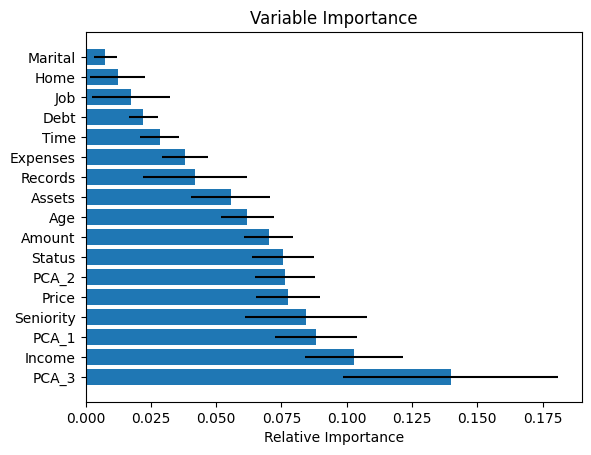

In [82]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

scaler.fit(data)
X_normalized=scaler.transform(data)
pca.fit(X_normalized)
X_pca=pca.transform(X_normalized)
X_normalized_pca = np.concatenate((X_normalized,X_pca), axis = 1) 

clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_normalized_pca, status)

# importances et standard deviations
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# Sort indices based on feature importances
sorted_idx = np.argsort(importances)[::-1]
features = np.array(list(csv.columns) + [f'PCA_{i+1}' for i in range(X_train_merged.shape[1] - len(csv.columns))]) #avec ajout
                                                                        #des 4 colonnes de pca
padding = np.arange(X_train_merged.shape[1]) + 0.5
plt.barh(padding, importances[sorted_idx], xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

**Remarque:** L'algorithme Random Forest nous aide a compredre quelles sont les colonnes les plus importante, vu qu'en l'utilisant on selectionne a chaque etape la racine du sous-arbre suivant, selon l'importance des colonnes.

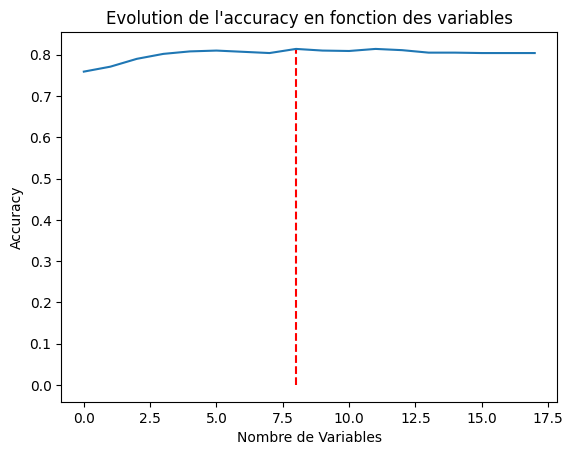

In [94]:
from sklearn.metrics import accuracy_score, precision_score

MLPC = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)  #,activation='tanh'
scores = np.zeros(X_train_merged.shape[1] + 1)

for f in np.arange(0, X_train_merged.shape[1] + 1):
    X1_f = X_train_merged[:, sorted_idx[:f + 1]]
    X2_f = X_test_merged[:, sorted_idx[:f + 1]]
    MLPC.fit(X1_f, y_train)
    YMLPC = MLPC.predict(X2_f)
    # Calculate custom score (accuracy + precision) / 2
    custom_score = (accuracy_score(y_test, YMLPC) + precision_score(y_test, YMLPC)) / 2
    scores[f] = np.round(custom_score, 3)

peak_index = np.argmax(scores)
plt.vlines(x=peak_index, ymin=0, ymax=scores[first_peak_index], color='red', linestyle='--')
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

Selon les résultats présentés dans un graphe, l'utilisation de **8 variables** maximise notre critère (précision et exactitude). Ainsi, nous utiliserons dans ce qui suit ces 8 variables.

## 3. GridSearchCV for Classifier Parameters

In [97]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features=list(features)

#on prend les 8 premieres colonnes autres que status
features_reordered = ['PCA_3', 'Income', 'PCA_1', 'Seniority', 'Price', 'PCA_2', 'Amount', 'Age'] 

#preparation des donnees
X_normalized_pca_8vars=X_normalized_pca[:, [features.index(col) for col in features_reordered]]
status = csv['Status']

MLPC = MLPClassifier(random_state=1)

parameters = {
    'hidden_layer_sizes': [(40, 20), (30, 30), (10, 50), (50, 10), (20, 40)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
}

# custom scoring function (average of accuracy and precision)
def custom_scorer(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return (acc + precision) / 2

# Create scorer object
custom_scorer_object = make_scorer(custom_scorer)

gridMlp = GridSearchCV(MLPC, parameters, scoring=custom_scorer_object)
gridMlp.fit(X_normalized_pca_8vars, status)

GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(40, 20), (30, 30), (10, 50),
                                                (50, 10), (20, 40)]},
             scoring=make_scorer(custom_scorer))

In [98]:
print(gridMlp.best_params_)
print(gridMlp.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': (30, 30)}
0.809026989511346


### Analyse: 

Par défaut, la fonction GridSearchCV utilise la validation croisée pour rechercher les bons paramètres selon le critère de l'exactitude (accuracy). Nous créons alors un nouveau critère, "customed score", basé sur la moyenne (accuragy+précision)/2.

Les résultats montrent que la meilleure fonction d'activation est :
- ReLu, avec les paramètres (30,30) donnant un score de 0.809.

On peut vérifier approximativement ceci en utilisant ces paramètres dans la fonction d'analyse ci-dessus ou dans la pipeline suivante (il faut cependant faire attention au fait que dans la fonction d'analyse, nous n'avons pas les composants de PCA, et que le score renvoyé par la pipeline représente l'exactitude seulement et utilise toutes les variables. C'est la raison pour laquelle la vérification est approximative).

## 4. Pipeline Creation

In [107]:
from sklearn.pipeline import Pipeline
import pickle

pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=4)),
                 ('mlp', MLPClassifier(activation = 'relu', hidden_layer_sizes = (30,30)))])

pipe.fit(X_train, y_train)
pipeScore = pipe.score(X_test, y_test)

print(pipeScore)

file_pickle = pickle.dump(pipe, open('pickle.pkl', 'wb'))
file = open('pickle.pkl', 'rb')
print(pickle.load(file))

0.7760511882998172
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('mlp', MLPClassifier(hidden_layer_sizes=(30, 30)))])


#### Remarque importante:

Dans le cas où nous n'avons pas choisi PCA, nous aurions préparé les données d'entraînement avec seulement 8 variables. Mais vu que nous utilisons PCA (c'est-à-dire les variables seront définies après l'appel de la pipeline mais pas avant), on laisse les données telles qu'elles sont.

## 5. Algorithms Comparision

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

clfs = {
 'RF': RandomForestClassifier(n_estimators=200, random_state=1),
 'KNN': KNeighborsClassifier(n_neighbors=5),
 'DT': DecisionTreeClassifier(random_state = 1),
 'GNB': GaussianNB(),
 'ID3': DecisionTreeClassifier(criterion='entropy'),
 'DS': SGDClassifier(loss="hinge", max_iter=1),
 'MLP': MLPClassifier(hidden_layer_sizes=(20, 10)),
 'BC': BaggingClassifier(n_estimators=200),
 'ADA': AdaBoostClassifier(n_estimators=200)
}

In [6]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import roc_auc_score, recall_score, precision_score
import time
import pandas as pd

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

clfs = {
    'RF': RandomForestClassifier(n_estimators=200, random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'CART': DecisionTreeClassifier(random_state=1), 
    'DS': DecisionTreeClassifier(max_depth=1, random_state=1), #Decision Stump
    'ID3': DecisionTreeClassifier(criterion='entropy'),  #Arbre ID3
    'GNB': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10)),
    'BC': BaggingClassifier(n_estimators=200),
    'ADA': AdaBoostClassifier(n_estimators=200),
    'XGBoost': XGBClassifier(n_estimators=200)
}

def run_classifiers(clfs, X, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    

    results = []

    for i in clfs:
        clf = clfs[i]
        start = time.time()
        cv_acc = cross_validate(clf, X, y, cv=kf, scoring=['accuracy', 'precision', 'roc_auc'])
        end = time.time()
        average_mean = np.mean((cv_acc['test_accuracy'] + cv_acc['test_precision']) / 2)
        average_std = np.std((cv_acc['test_accuracy'] + cv_acc['test_precision']) / 2)

        results.append({
            'Classifier': i,
            'AUC Mean': np.mean(cv_acc['test_roc_auc']),
            'AUC Std': np.std(cv_acc['test_roc_auc']),
            'Criterion Mean': average_mean,
            'Criterion Std': average_std,
            'Execution Time': end - start
        })

    df_results = pd.DataFrame(results)
    print(df_results)

In [114]:
run_classifiers(clfs, X_normalized, status) 

#on utilise toutes les donnees avec toutes les colonnes(variables), car la selection de 8 variables etaient specifiques au MLPC

  Classifier  AUC Mean   AUC Std  Criterion Mean  Criterion Std  \
0         RF  0.828890  0.017853        0.800532       0.013420   
1        KNN  0.764747  0.021969        0.789293       0.016889   
2       CART  0.656099  0.032054        0.767468       0.021554   
3         DS  0.618080  0.028328        0.731008       0.019058   
4        ID3  0.652007  0.035808        0.765607       0.020410   
5        GNB  0.795062  0.025065        0.804565       0.013645   
6        MLP  0.832328  0.018810        0.805298       0.022753   
7         BC  0.821519  0.017934        0.802447       0.013766   
8        ADA  0.821576  0.019152        0.807404       0.015304   
9    XGBoost  0.805238  0.021779        0.792732       0.016905   

   Execution Time  
0       19.505867  
1        1.661516  
2        0.429888  
3        0.092788  
4        0.438807  
5        0.092741  
6       22.179679  
7       51.959227  
8       11.512259  
9        2.995993  


### Analyse:
Plusieurs algorithmes donnent de bons résultats, dont Random Forest, MLP, Bagging, Ada Boost et XGB avec une AUC d'au moins 80% et une moyenne de critère d'au moins 79%. Cependant, en ajoutant le temps d'exécution comme critère, le classifieur XGB et GNB l'emportent.

# II. Apprentissage supervisé : Données hétérogènes 

## 1. Considering Numerical values

### Before normalization

In [13]:
data = pd.read_csv('./credit.data', sep='\s+', names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])

data_DroppedNan = data.replace({'?':np.nan}).dropna()

col_num = [1,2,7,10,13,14]
col_cat = [0,3,4,5,6,8,9,11,12]
X_Numerique = data_DroppedNan.iloc[:,col_num].astype(float).values
Y = data_DroppedNan['15']
print(X_Numerique.shape)
print(Y.shape)

countPositive = (Y == '+').sum()
countNegative = (Y == '-').sum()

print("pourcentage d'obseravtion ayant un status positive :  {:.2f}%".format((countPositive/653)*100))
print("pourcentage d'obseravtion ayant un status negative :  {:.2f}%".format((countNegative/653)*100))

(653, 6)
(653,)
pourcentage d'obseravtion ayant un status positive :  45.33%
pourcentage d'obseravtion ayant un status negative :  54.67%


AxesSubplot(0.125,0.11;0.775x0.77)


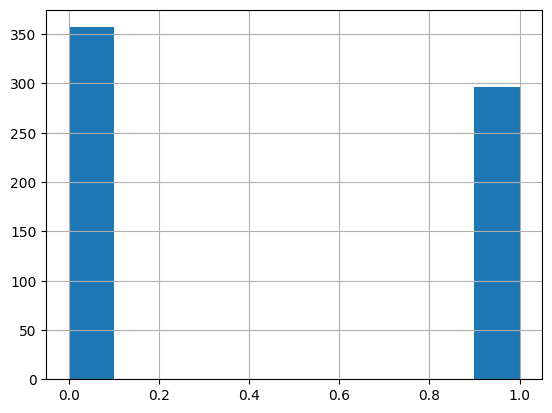

In [14]:
Y = Y.replace({'+': 1, '-': 0})
print(Y.hist())

In [117]:
run_classifiers(clfs,X_Numerique,Y)

  Classifier  AUC Mean   AUC Std  Criterion Mean  Criterion Std  \
0         RF  0.842319  0.047373        0.789934       0.056804   
1        KNN  0.726159  0.063318        0.688688       0.065742   
2       CART  0.732821  0.047397        0.730020       0.047039   
3         DS  0.722740  0.073964        0.801607       0.093647   
4        ID3  0.719744  0.038722        0.716635       0.048710   
5        GNB  0.797762  0.053839        0.771644       0.048369   
6        MLP  0.729178  0.051145        0.748306       0.054541   
7         BC  0.825733  0.054128        0.789579       0.064739   
8        ADA  0.828204  0.063821        0.788374       0.061789   
9    XGBoost  0.826717  0.055984        0.749566       0.055197   

   Execution Time  
0        6.148591  
1        0.072804  
2        0.059846  
3        0.042879  
4        0.058843  
5        0.045877  
6        1.711385  
7        6.953447  
8        4.065126  
9        1.149882  


### After StandardScaler Normalization

In [118]:
scaler = StandardScaler()
X_Numerique_scaled = scaler.fit_transform(X_Numerique)
run_classifiers(clfs, X_Numerique_scaled, Y)

  Classifier  AUC Mean   AUC Std  Criterion Mean  Criterion Std  \
0         RF  0.843461  0.047003        0.783503       0.065944   
1        KNN  0.809655  0.054295        0.769683       0.052344   
2       CART  0.735526  0.046254        0.733787       0.043966   
3         DS  0.722740  0.073964        0.801607       0.093647   
4        ID3  0.721357  0.044176        0.723662       0.055941   
5        GNB  0.797860  0.053920        0.771644       0.048369   
6        MLP  0.834993  0.039916        0.801705       0.059148   
7         BC  0.826161  0.053218        0.790641       0.071563   
8        ADA  0.828299  0.063809        0.788374       0.061789   
9    XGBoost  0.826717  0.055984        0.749566       0.055197   

   Execution Time  
0        5.507269  
1        0.083776  
2        0.063829  
3        0.046875  
4        0.099770  
5        0.072810  
6        3.761898  
7        8.957970  
8        4.687418  
9        1.312486  


### After MinMaxScaler Normalization

In [119]:
scaler = MinMaxScaler()
X_Numerique_scaledMinMax = scaler.fit_transform(X_Numerique)
run_classifiers(clfs, X_Numerique_scaledMinMax, Y)

  Classifier  AUC Mean   AUC Std  Criterion Mean  Criterion Std  \
0         RF  0.842893  0.046673        0.785818       0.060409   
1        KNN  0.785023  0.045921        0.731029       0.057245   
2       CART  0.734137  0.047724        0.732010       0.046826   
3         DS  0.722740  0.073964        0.801607       0.093647   
4        ID3  0.730008  0.053782        0.733775       0.064763   
5        GNB  0.797814  0.053885        0.771644       0.048369   
6        MLP  0.820722  0.062332        0.788794       0.052897   
7         BC  0.829392  0.052180        0.789522       0.068506   
8        ADA  0.830016  0.062252        0.788374       0.061789   
9    XGBoost  0.826717  0.055984        0.749566       0.055197   

   Execution Time  
0        5.380644  
1        0.084769  
2        0.067827  
3        0.047874  
4        0.061792  
5        0.042928  
6        3.266270  
7        8.284829  
8        4.474993  
9        1.380307  


## 2. Considering all the values

In [15]:
extracted_data = data.iloc[:, 0:15].values

In [16]:
#categorical vars
X_cat = np.copy(extracted_data[:, col_cat]) 
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

In [17]:
#numerical vars
X_num = np.copy(extracted_data[:, col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

In [18]:
print(X_num.shape)
print(X_cat.shape)
print(extracted_data.shape)

(688, 6)
(688, 9)
(688, 15)


In [19]:
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder, LabelEncoder as LabelEncoder
X_cat_bin =OneHotEncoder().fit_transform(X_cat).toarray()

### Data Construction

In [20]:
X_stacked = np.hstack((X_num, X_cat_bin))
#print(X_stacked[1:5,:])

In [31]:
Y=data['15'].ravel()
run_classifiers(clfs, X_stacked, Y_bin)

  Classifier  AUC Mean   AUC Std  Criterion Mean  Criterion Std  \
0         RF  0.931138  0.029889        0.886330       0.034859   
1        KNN  0.731259  0.042440        0.696165       0.052884   
2       CART  0.812594  0.045563        0.824900       0.045690   
3         DS  0.865709  0.039964        0.895271       0.038149   
4        ID3  0.811389  0.054105        0.825040       0.050325   
5        GNB  0.915297  0.038283        0.832360       0.044751   
6        MLP  0.824689  0.086351        0.782820       0.053490   
7         BC  0.926571  0.027410        0.882476       0.045602   
8        ADA  0.902939  0.033685        0.841229       0.041121   
9    XGBoost  0.930291  0.024573        0.885148       0.035493   

   Execution Time  
0        9.465137  
1        0.361787  
2        0.164518  
3        0.091803  
4        0.152583  
5        0.085774  
6        3.792859  
7       18.421761  
8       10.878380  
9        2.234025  


### Analyse
Avec les nouveaux scores supérieurs à 90%, nous concluons qu'il y a eu une perte d'information importante. D'où la nécessité du traitement des données avant chaque entraînement.